# Titanic Survivor Predictor


## Project by - Tanishq Soin, AI-ML LiveTut G2 7-8pm

### Imports

In [205]:
import warnings
warnings.filterwarnings('ignore')

### Read and Explore Data

In [206]:
import pandas as pd
df = pd.read_csv('./TrainingData/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [207]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [208]:
df.shape

(891, 12)

In [209]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [210]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [211]:
df[df.Sex == 'male'].Survived.value_counts().sum()

577

In [212]:
df[df.Sex == 'female'].Survived.value_counts().sum()

314

In [213]:
df[['Sex', 'Survived']].groupby('Sex', as_index= False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [214]:
df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [215]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [216]:
df[['SibSp', 'Survived']].groupby('SibSp', as_index= False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [217]:
df[['Pclass', 'Survived']].groupby('Pclass', as_index= False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [218]:
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [219]:
df[['Parch', 'Survived']].groupby('Parch', as_index= False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [220]:
df.Age.agg(['max', 'min', 'mean', 'median'])

max       80.000000
min        0.420000
mean      29.699118
median    28.000000
Name: Age, dtype: float64

In [221]:
df.Fare.agg(['max', 'min', 'mean', 'median'])

max       512.329200
min         0.000000
mean       32.204208
median     14.454200
Name: Fare, dtype: float64

In [222]:
df.sort_values('Fare', ascending= False)[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


In [223]:
df[df.Fare == 0.0].Survived.value_counts()

0    14
1     1
Name: Survived, dtype: int64

In [224]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [225]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Data Visualization

In [227]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [228]:
def bar_Chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    bar = pd.DataFrame([survived,dead])
    bar.index = ['Survived','Dead']
    bar.plot(kind='bar',stacked=True, figsize=(10,5))
    

Survived :
 female    233
male      109
Name: Sex, dtype: int64
Dead:
 male      468
female     81
Name: Sex, dtype: int64


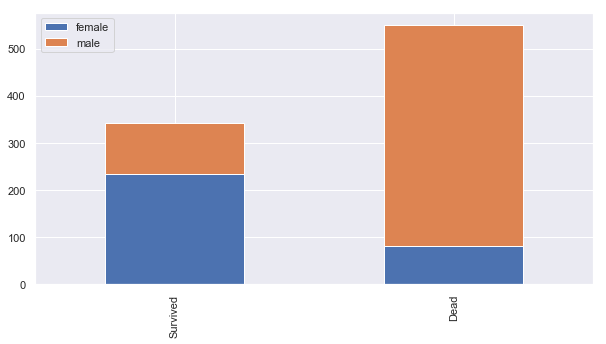

In [229]:
bar_Chart('Sex')
print("Survived :\n",df[df['Survived']==1]['Sex'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Sex'].value_counts())
plt.savefig('E://courses//plots//Sex.png', format= 'png')


Survived :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


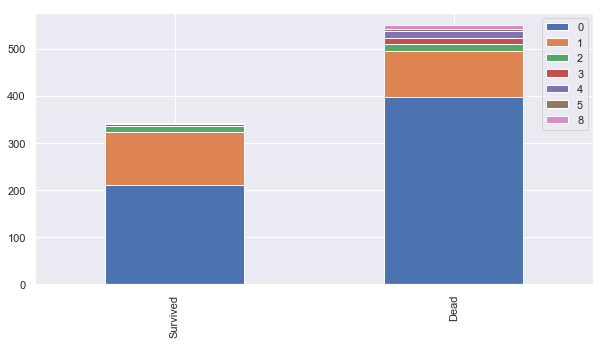

In [230]:
bar_Chart('SibSp')
print("Survived :\n",df[df['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",df[df['Survived']==0]['SibSp'].value_counts())
plt.savefig('E://courses//plots//SibSp.png', format= 'png')

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


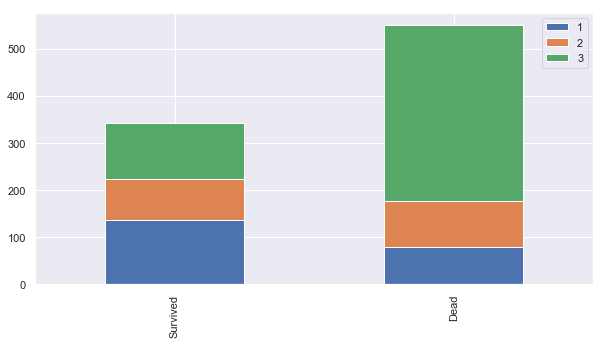

In [231]:
bar_Chart('Pclass')
print("Survived :\n",df[df['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Pclass'].value_counts())
plt.savefig('E://courses//plots//Pclass.png', format= 'png')

Survived :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


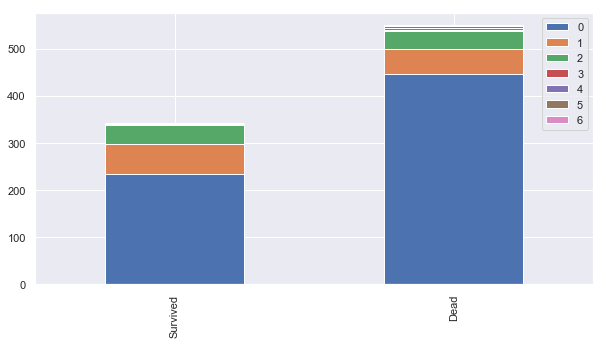

In [232]:
bar_Chart('Parch')
print("Survived :\n",df[df['Survived']==1]['Parch'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Parch'].value_counts())
plt.savefig('E://courses//plots//Parch.png', format= 'png')

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


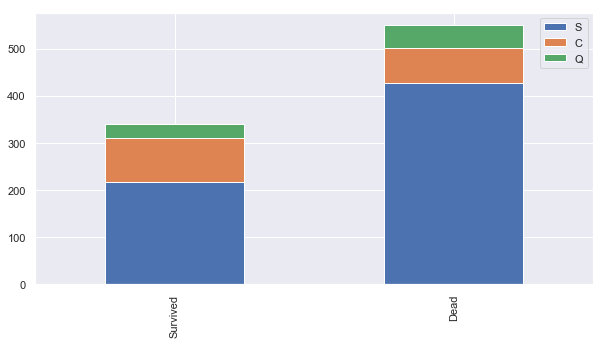

In [233]:
bar_Chart('Embarked')
print("Survived :\n",df[df['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Embarked'].value_counts())
plt.savefig('E://courses//plots//Embarked.png', format= 'png')

In [234]:
df.fillna({'Age': df.Age.median()}, inplace = True)
test.fillna({'Age': test.Age.median()}, inplace = True)

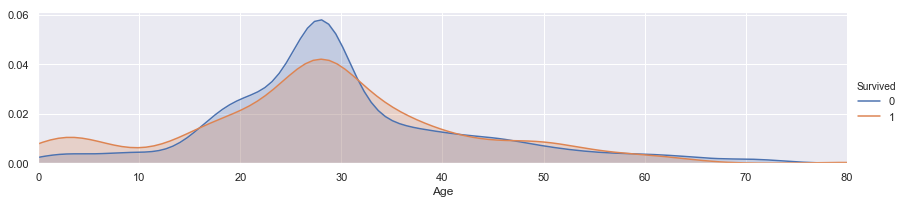

<Figure size 432x288 with 0 Axes>

In [235]:
ft = sns.FacetGrid(df, hue="Survived",aspect=4)
ft.map(sns.kdeplot,'Age',shade= True)
ft.set(xlim=(0, df['Age'].max()))
ft.add_legend() 
plt.show()
plt.savefig('E://courses//plots//FacetGrid.png', format= 'png')



## Preparing Dataset

In [236]:
df1 = df[['Pclass', 'Age', 'Fare']]

In [237]:
df1.head()

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500


In [238]:
df2 = pd.get_dummies(df['Sex'])
df2.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [239]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
Pclass    891 non-null int64
Age       891 non-null float64
Fare      891 non-null float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [240]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
female    891 non-null uint8
male      891 non-null uint8
dtypes: uint8(2)
memory usage: 1.8 KB


In [241]:
final_data = pd.concat((df1, df2), axis=1)
final_data.head(10)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
5,3,28.0,8.4583,0,1
6,1,54.0,51.8625,0,1
7,3,2.0,21.0750,0,1
8,3,27.0,11.1333,1,0
9,2,14.0,30.0708,1,0


In [242]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [243]:
X  = final_data.values

In [244]:
y = df.Survived.values

In [245]:
X.shape

(891, 5)

In [246]:
y.shape

(891,)

In [247]:
from sklearn.preprocessing import StandardScaler as ss
scale = ss()

In [248]:
X = scale.fit_transform(X)
print(X)


[[ 0.82737724 -0.56573646 -0.50244517 -0.73769513  0.73769513]
 [-1.56610693  0.66386103  0.78684529  1.35557354 -1.35557354]
 [ 0.82737724 -0.25833709 -0.48885426  1.35557354 -1.35557354]
 ...
 [ 0.82737724 -0.1046374  -0.17626324  1.35557354 -1.35557354]
 [-1.56610693 -0.25833709 -0.04438104 -0.73769513  0.73769513]
 [ 0.82737724  0.20276197 -0.49237783 -0.73769513  0.73769513]]


In [249]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1 )

## Modelling

In [250]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import numpy as np

In [251]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

In [252]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
acc_dtc = accuracy_score(y_test, y_pred_dtc)
print(cm_dtc)

[[91 15]
 [26 47]]


In [253]:
print(acc_dtc)

0.770949720670391


In [254]:
from sklearn.tree import export_graphviz

export_graphviz(dtc, out_file='./tree.dat')

## Cross Validation

In [255]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVM', SVC(kernel='rbf')))

seed = 7
results = []
names = []
scoring = 'accuracy'

In [256]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [257]:
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.785630 (0.026821)
RFC: 0.817116 (0.037930)
DTC: 0.788976 (0.036635)
SVM: 0.802534 (0.041996)


## Bloxplot Algorithm Comparison

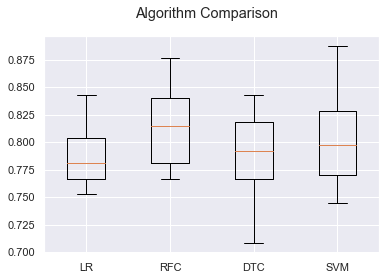

<Figure size 432x288 with 0 Axes>

In [258]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig('E://courses//plots//boxplot.png', format= 'png')